<a href="https://colab.research.google.com/github/zebakhan123/Exploratory-Data-Analysis-/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [7]:
# Importing pandas ,numpy,matplotlib.pyplot & seaborn
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Mounting the google drive with coolab notebook 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Defining the path where data is kept
path='/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv'
df = pd.read_csv(path)

## ***Handling missing, duplicate, and bogus values***
**Understannding the data**

In [24]:
# Checking for the data type of fields and their null or non status 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [23]:
# Checking for the exact null count of non null fields
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [34]:
# Checking to see the count of duplicate records accross the entire data frame
df.duplicated().sum()


0

In [35]:
# Replacing 16 nan values in name with blank space
df['name'] = df['name'].fillna('Name Not Available')

In [60]:
# Checking the number of records where there is 0 price for an airbnb
(df['price']==0).sum()

11

In [63]:
# Removing all the records whose listed price is zero
df=df.loc[df['price']>0]
(df['price']==0).sum() # Checking if above command has worked properly

0

In [22]:
# Checking how null records look like
df[df['last_review'].isnull()].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249


In [41]:
# Converting date str to date time object
df['last_review']=pd.to_datetime(df['last_review'])
# Checking to see if above command has worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [42]:
# Filling the 10052 nan values in #reviews_per_month to 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df[df['reviews_per_month'].isnull()].head(2) # Just verifying if earlier command worked successfully

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [44]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [45]:
# Checking the above table, we find minimum value for availability_365 = 0 and 25% of values in availability_365 is 0
# (1/4th airbnbs are avaiable for 0 night throughout the year) 
#---no_available_rooms_df=df.loc[df['availability_365']==0]
#removing all the homes which are available for zero-days
#----df=df.loc[df['availability_365']>0]


In [30]:
# Checking the count of unique records accross each field
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## **Airbnb Disrtibution in different Neighbourhood Groups ** 

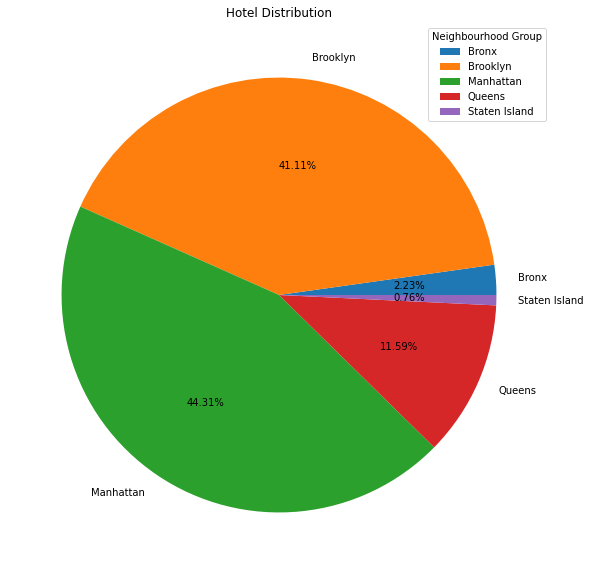

In [66]:
# Percentage share of airbnb by each neighbourhood group
import matplotlib.pyplot as plt
import seaborn as sns
#sns.distplot(df.groupby('neighbourhood_group')['neighbourhood_group'].count(), kind=pie)
plt.figure(figsize=(10,10))
mylabels = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
plt.pie(df.groupby('neighbourhood_group')['neighbourhood_group'].count() , autopct='%1.2f%%', labels = mylabels)
#plt.pie(df.groupby('neighbourhood_group')['neighbourhood_group'].count() , autopct='%1.2f%%')
plt.legend(title = "Neighbourhood Group")
plt.title("Hotel Distribution")
#plt.figure(figsize=(45,150))
plt.show()

In [70]:
#neighbourhood group vs room type
#   rt1  rt2  rt3
#n1
#n2
#n3
#n4

df.groupby(['neighbourhood_group'])['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         651
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10126
                     Entire home/apt     9558
                     Shared room          411
Manhattan            Entire home/apt    13198
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

In [76]:
# To make the above table more structured 
df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,651,60
Brooklyn,9558,10126,411
Manhattan,13198,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


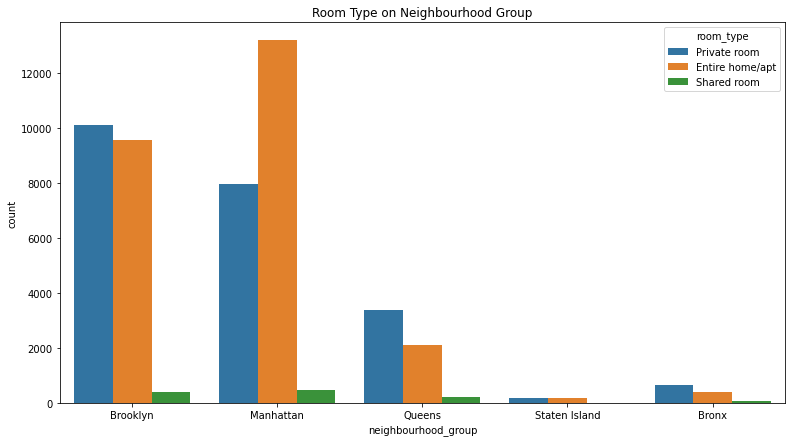

In [77]:
# Plotting the distribution of Room Types in various Neighbourhood Groups
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type)
plt.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

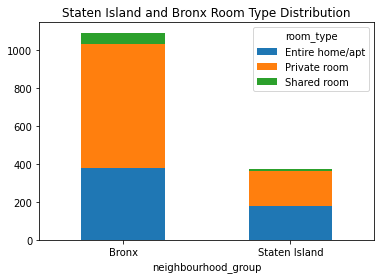

In [98]:
# Individual analysis of Staten Island and Bronx (since above plot doesnot give a readable number)
new_data_frame=df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()
new_data_frame.iloc[0:5:4].plot(kind='bar', stacked=True)
plt.title('Staten Island and Bronx Room Type Distribution')
plt.xticks(rotation=360, ha='center')

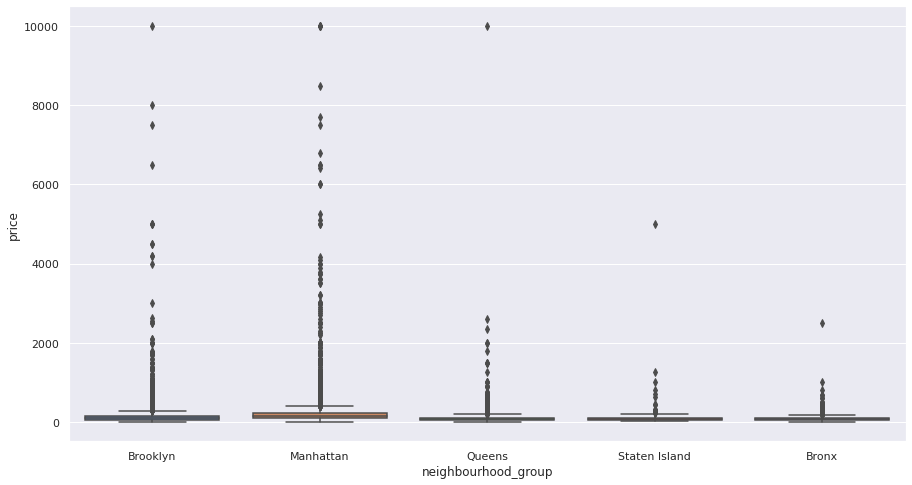

In [110]:
# Average Price Distribution of neighbourhood group
sns.set(rc={"figure.figsize":(15, 8)})
sns.boxplot(data=df, x=df['neighbourhood_group'], y=df['price'])

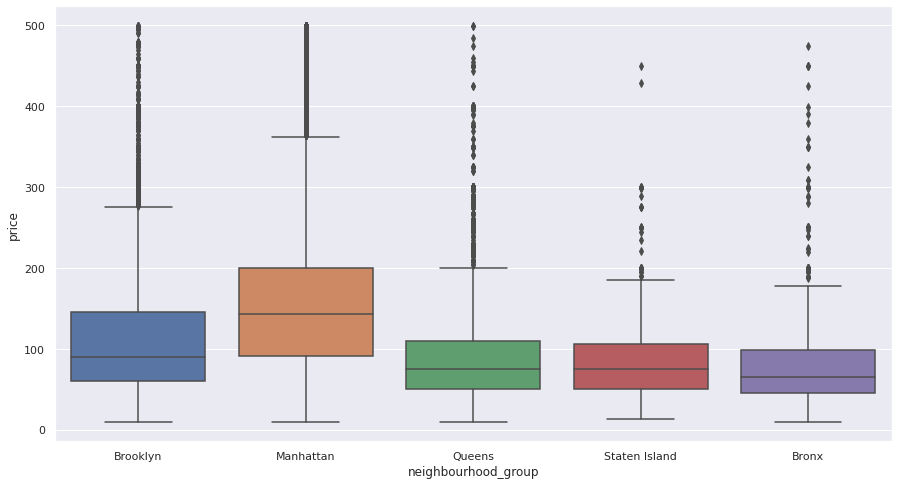

In [112]:
#  Creating a sub-dataframe with extreme values  less than 500 (To understand data that was not visible in the upper graph)
sub_df=df[df.price < 500]
sns.set(rc={"figure.figsize":(15, 8)})
sns.boxplot(data=sub_df, x=sub_df['neighbourhood_group'], y=sub_df['price'])

In [124]:
# Calculating Mean Price of the neighbourhood values
#df['neighbourhood'].value_counts().reset_index().rename(columns={"index": "neighbourhood", "neighbourhood": df['price'].mean()})
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)
#df.groupby(['neighbourhood_group'])['room_type'].value_counts()

neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64

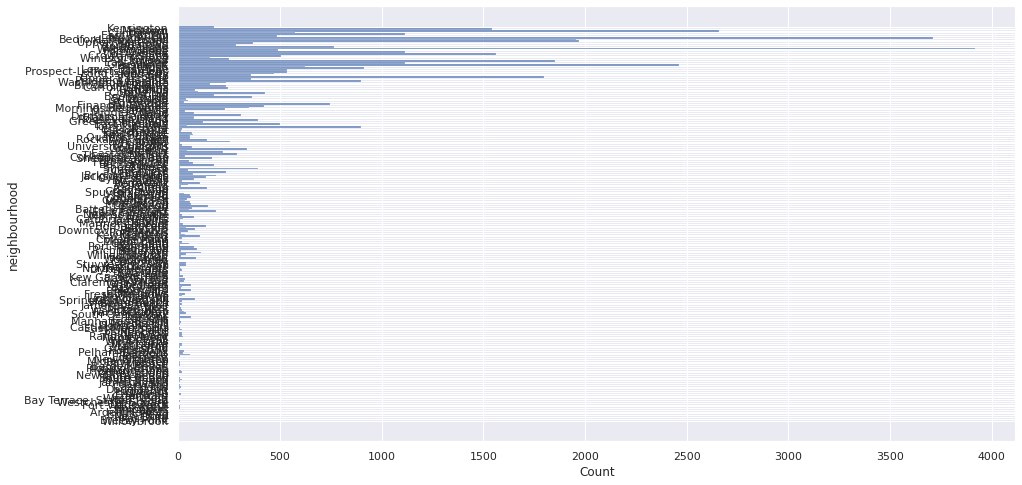

In [148]:
data1=df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)
sns.histplot(data=df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True).tail(10), y=df['neighbourhood'])

In [134]:
data1.head(10)

neighbourhood
Bull's Head       47.333333
Hunts Point       50.500000
Tremont           51.545455
Soundview         53.466667
New Dorp          57.000000
Bronxdale         57.105263
New Dorp Beach    57.400000
Grant City        57.666667
Concord           58.192308
Mount Eden        58.500000
Name: price, dtype: float64

In [11]:
df.groupby(['neighbourhood_group'])['minimum_nights'].describe() #.unstack()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,4.560953,15.631792,1.0,1.0,2.0,3.0,365.0
Brooklyn,20104.0,6.056556,17.632726,1.0,2.0,3.0,5.0,999.0
Manhattan,21661.0,8.579151,24.050857,1.0,1.0,3.0,6.0,1250.0
Queens,5666.0,5.181433,15.028725,1.0,1.0,2.0,3.0,500.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


In [12]:
df.groupby(['neighbourhood_group'])['minimum_nights'].describe().transpose()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1091.000000,20104.000000,21661.000000,5666.000000,373.000000
mean,4.560953,6.056556,8.579151,5.181433,4.831099
std,15.631792,17.632726,24.050857,15.028725,19.727605
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,3.000000,3.000000,2.000000,2.000000
75%,3.000000,5.000000,6.000000,3.000000,3.000000
max,365.000000,999.000000,1250.000000,500.000000,365.000000


Text(0.5, 0, 'neighbourhood_group')

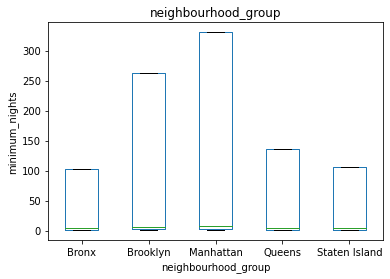

In [14]:
import matplotlib.pyplot as plt
df.groupby(['neighbourhood_group'])['minimum_nights'].describe().transpose().plot(kind="box" , showfliers=False)
plt.title('neighbourhood_group')
plt.ylabel('minimum_nights')
plt.xlabel('neighbourhood_group')

In [15]:
# Since maximum= Q3 + 1.5(IQR) we get 11 becuase minimum night criterion over and above 75 percentile criterion of values greater than 5 are understandable but upto 999 is not accurate

In [16]:
df = pd.read_csv(path,parse_dates=['last_review'])

In [17]:
#After writing parse_dates=['last_review'] using df.info()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [19]:
#last_review is now datetime64[ns] and not datetime64[ns]

In [20]:
df.shape

(48895, 16)

In [21]:
# is.na values and absurd numerical values of variable of interest

In [22]:
df.groupby('neighbourhood_group')['neighbourhood_group'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

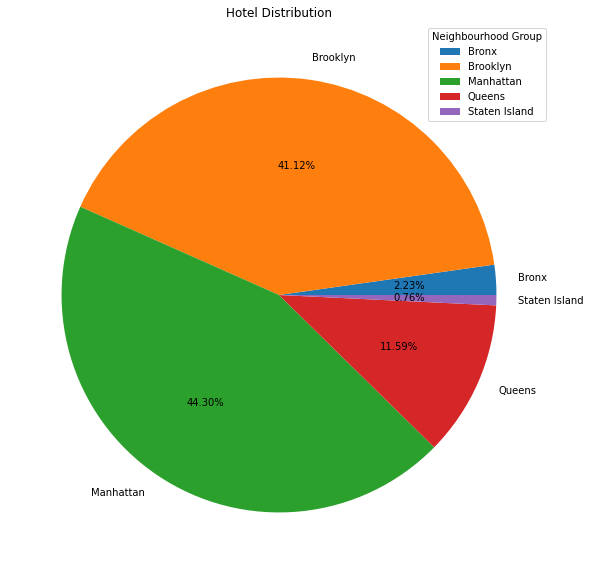

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.distplot(df.groupby('neighbourhood_group')['neighbourhood_group'].count(), kind=pie)
plt.figure(figsize=(10,10))
mylabels = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
plt.pie(df.groupby('neighbourhood_group')['neighbourhood_group'].count() , autopct='%1.2f%%', labels = mylabels)
#plt.pie(df.groupby('neighbourhood_group')['neighbourhood_group'].count() , autopct='%1.2f%%')
plt.legend(title = "Neighbourhood Group")
plt.title("Hotel Distribution")
#plt.figure(figsize=(45,150))
plt.show()

In [24]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10,5))
#plt.scatter(x=df['longitude'], y=df['latitude'])

#colors = np.random.rand(N)
#plt.show()

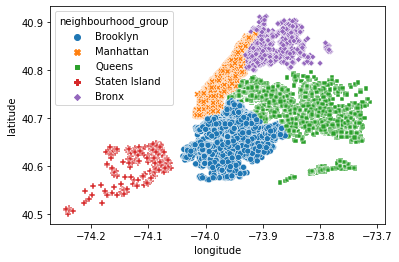

In [25]:

sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'], style=df['neighbourhood_group'])
#sns.palplot(sns.color_palette("muted"))
#sns.figsize()
sns.set(rc= {"figure.figsize": (15, 10)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


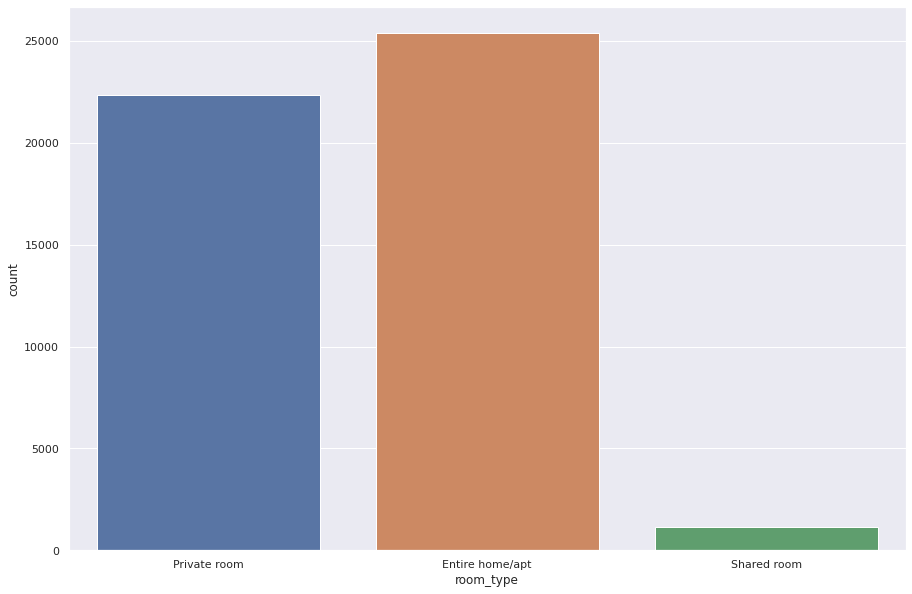

In [26]:
sns.countplot(df.room_type)

In [28]:
df.groupby(['neighbourhood_group'])['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

In [29]:
df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [30]:
new_data_frame=df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()
new_data_frame

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [31]:
new_data_frame.iloc[1:3]

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Brooklyn,9559,10132,413
Manhattan,13199,7982,480


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

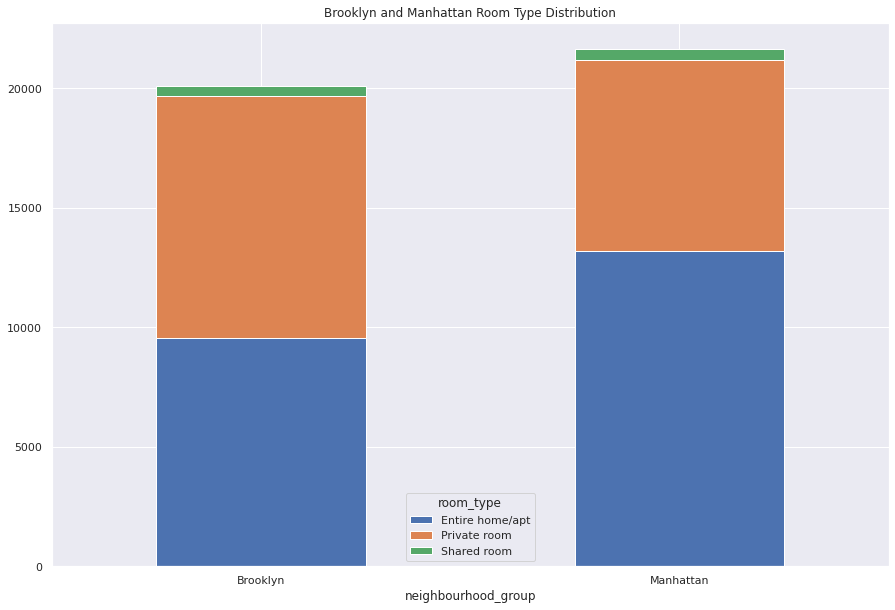

In [32]:
new_data_frame.iloc[1:3].plot(kind='bar', stacked=True)
plt.title('Brooklyn and Manhattan Room Type Distribution')
plt.xticks(rotation=360, ha='center')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


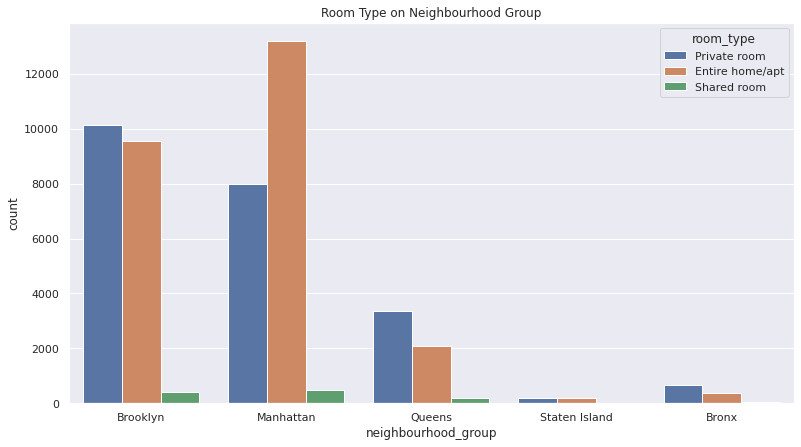

In [33]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type)
plt.show()

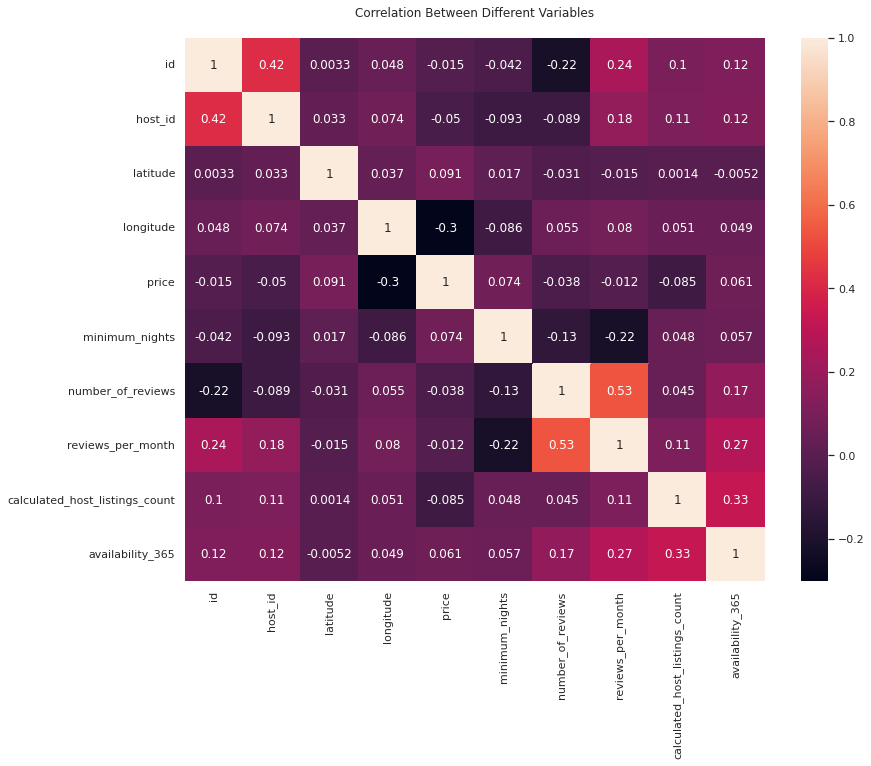

In [34]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

In [37]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [56]:
# pre cleaning result vs post cleaning result
# minimum_nights is way too absurd
#Remove unnecessary attributes -- id,host_name,host_name
# Replace null values with 0
# no rows to be removed
# my target attribute is price na so uspe zada se zada graphs